In [96]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
poc1_folder = pathlib.Path("../../data/POC1_data/")

all_cities_metrics = poc1_folder / "final_df.csv"
all_cities_df = pd.read_csv(all_cities_metrics)

In [98]:
all_cities_df.shape

(8909, 102)

In [99]:
all_cities_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop,pop_density,prop_used_area
0,indonesia,IDN,wates,12375,0.036690,0.038630,0.004276,0.004359,1.065403,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22689.351429,0.168496
1,brazil,BRA,taquaralto,1186,0.024520,0.035016,0.001195,0.001439,1.008276,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9363.163689,0.481018
2,china,CHN,xinqiao,12218,0.036481,0.045724,0.001608,0.001723,1.016544,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4747.217111,0.525190
3,colombia,COL,yopal,687,0.016110,0.019414,0.001072,0.001221,1.011106,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29654.434191,0.352858
4,czech_republic,CZE,pilsen,2886,0.032913,0.044298,0.001418,0.001758,1.047311,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5057.822603,0.530648


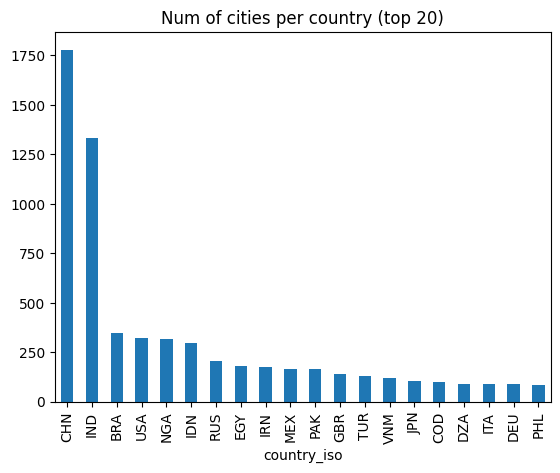

In [100]:
top = 20
ax = all_cities_df['country_iso'].value_counts()[:top].plot.bar()
ax.set_title(f"Num of cities per country (top {top})")
plt.show()

In [101]:
chosen_cities_path = poc1_folder / "chosen_cities.csv"
planned_df = pd.read_csv(chosen_cities_path)

In [102]:
planned_df.shape

(313, 56)

In [103]:
planned_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,meshedness_coefficient,pop_density,prop_used_area,big,organic,3_way_cities,type_one_city,type_two_city,city_type,chosen
0,brazil,BRA,gurupi,1167,0.025382,0.031759,0.001664,0.001856,1.010663,19.0,...,0.979855,9288.154109,0.350082,False,True,False,True,False,1,True
1,ecuador,ECU,pasaje,435,0.019233,0.021797,0.001809,0.001994,1.019819,4.0,...,1.006275,23517.269167,0.261534,False,True,False,True,False,1,True
2,colombia,COL,el_carmen_de_bolivar,608,0.029501,0.029762,0.001410,0.001443,1.019432,26.0,...,1.087108,26846.920532,0.313369,False,True,False,True,False,1,True
3,kazakhstan,KAZ,zhanaozen,5649,0.026850,0.031626,0.002316,0.002450,1.023291,7.0,...,1.026153,10670.246699,0.381292,False,True,False,False,True,2,True
4,china,CHN,juxian,11648,0.043680,0.047587,0.003427,0.003780,1.009743,4.0,...,0.906621,4773.471552,0.598367,False,True,False,True,False,1,True


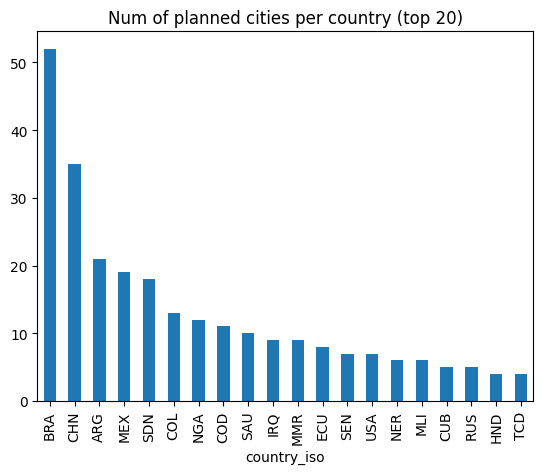

In [104]:
top = 20
ax = planned_df['country_iso'].value_counts()[:top].plot.bar()
ax.set_title(f"Num of planned cities per country (top {top})")
plt.show()

In [105]:
planned_df[['node_count', 'k_avg']].describe().T

,count,mean,std,min,25%,50%,75%,max
node_count,313.0,3290.869010,11335.079102,9.000000,545.000000,1509.000000,2866.000000,162623.000000
k_avg,313.0,3.223357,0.163385,2.222222,3.137931,3.241865,3.330544,3.646295


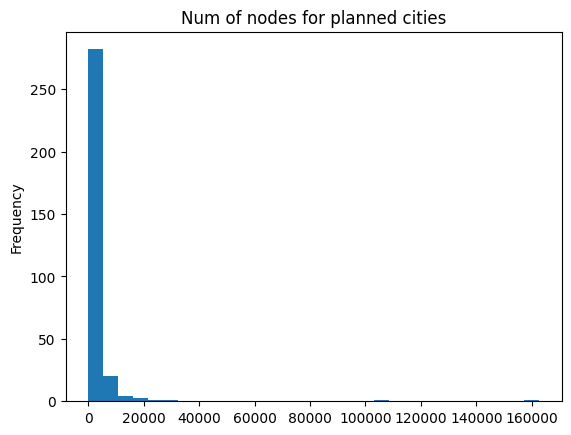

In [106]:
ax = planned_df['node_count'].plot.hist(bins=30)
ax.set_title("Num of nodes for planned cities")
plt.show()

Text(0.5, 1.0, 'Num of nodes all cities')

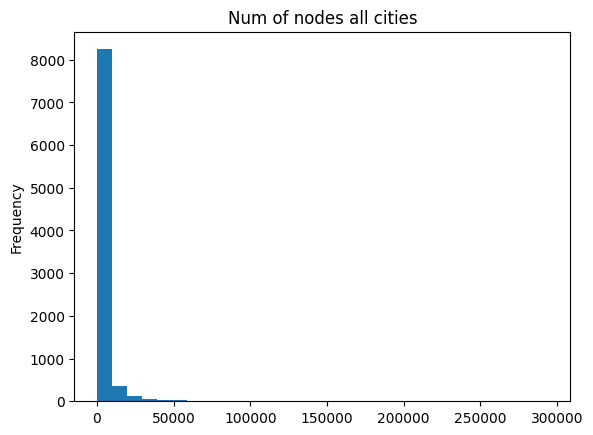

In [107]:
ax = all_cities_df['node_count'].plot.hist(bins=30)
ax.set_title("Num of nodes all cities")

Como os grafos tem, em média, grau 3.23, é esperado que tenham 3.23 * num_nodes arestas para cada grafo. Como existem grafos com muitos nós, por exemplo, mais que 40 mil, isso acarretaria em um custo alto de memória para o node2vec e outros carregarem. Assim, vou considerar para análise apenas grafos com menos de 12.5
mil nós e mais de 300 nós.

In [108]:
planned_df = planned_df.query('node_count < 12500 and node_count >= 300')
all_cities_df = all_cities_df.query('node_count < 12500 and node_count >= 300')

In [109]:
planned_df.shape, all_cities_df.shape

((245, 56), (6289, 102))

In [110]:
planned_cities_ids = planned_df['uc_id'].tolist()

In [111]:
len(planned_cities_ids)

245

In [112]:
all_cities_ids = all_cities_df['uc_id'].tolist()

In [113]:
len(all_cities_ids)

6289

In [114]:
not_planned_cities_ids = list(set(all_cities_ids) - set(planned_cities_ids))

In [115]:
len(not_planned_cities_ids)

6044

In [116]:
import random

In [125]:
random.seed(43)

random_planned_cities = random.sample(planned_cities_ids, k=150)
random_not_planned_cities = random.sample(not_planned_cities_ids, k=150)

In [126]:
len(set(random_planned_cities)), len(set(random_not_planned_cities))

(150, 150)

In [127]:
len(set(random_planned_cities) - set(random_not_planned_cities))

150

In [128]:
random_planned_cities_metrics = all_cities_df[all_cities_df['uc_id'].isin(random_planned_cities)]
random_not_planned_cities_metrics = all_cities_df[all_cities_df['uc_id'].isin(random_not_planned_cities)]

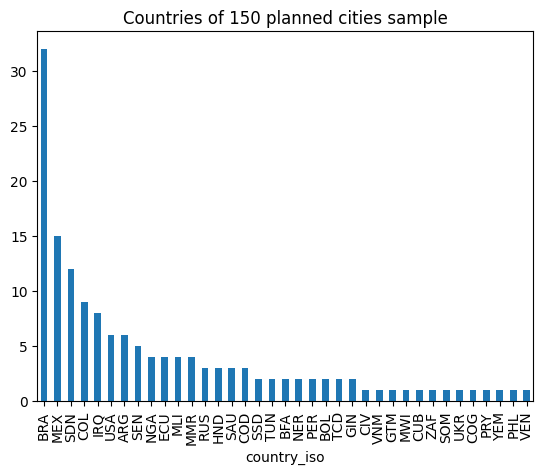

In [129]:
ax = random_planned_cities_metrics['country_iso'].value_counts().plot(kind='bar')
ax.set_title("Countries of 150 planned cities sample")
plt.show()

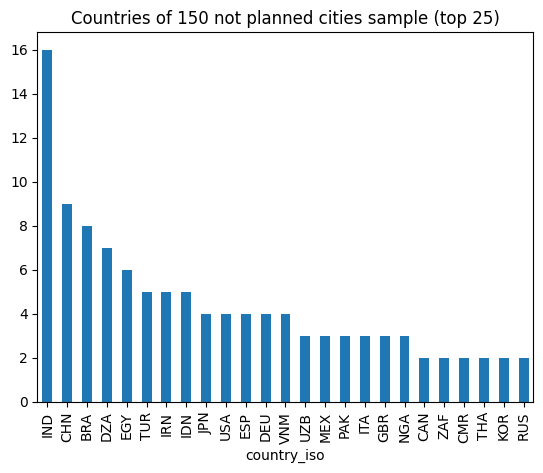

In [130]:
top = 25
ax = random_not_planned_cities_metrics['country_iso'].value_counts()[:top].plot(kind='bar')
ax.set_title(f"Countries of 150 not planned cities sample (top {top})")
plt.show()

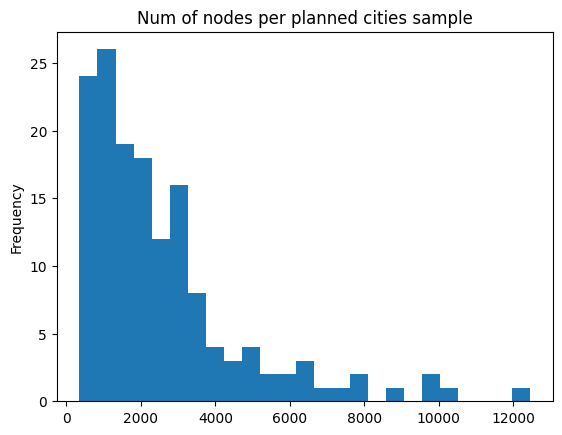

In [131]:
ax = random_planned_cities_metrics['node_count'].plot.hist(bins=25)
ax.set_title("Num of nodes per planned cities sample")
plt.show()

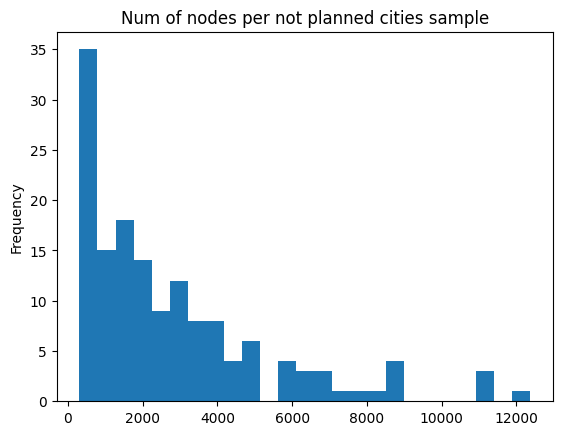

In [132]:
ax = random_not_planned_cities_metrics['node_count'].plot.hist(bins=25)
ax.set_title("Num of nodes per not planned cities sample")
plt.show()

In [133]:
import pickle

In [134]:
def pickle_to_file(file_path, data):
    with open(file_path, 'wb') as my_file:
        pickle.dump(data, my_file)

target_folder = pathlib.Path("../../data/POC2_data")
target_folder.mkdir(parents=True, exist_ok=True)

target_planned_cities_file = target_folder / 'random_planned_cities_id.pkl'
target_not_planned_cities_file = target_folder / 'random_not_planned_cities_id.pkl'

pickle_to_file(target_planned_cities_file, random_planned_cities)
pickle_to_file(target_not_planned_cities_file, random_not_planned_cities)

In [135]:
def unpickle_from_file(file_path):
    with open(file_path, 'rb') as my_file:
        data = pickle.load(my_file)
    return data

teste = unpickle_from_file(target_planned_cities_file)
print(teste)
teste = unpickle_from_file(target_not_planned_cities_file)
print(teste)

[1008, 734, 4341, 4676, 3621, 611, 1639, 1086, 1460, 1055, 1540, 10143, 1062, 1131, 1196, 248, 63, 977, 1220, 712, 10131, 103, 4155, 3658, 1084, 1100, 4509, 1255, 1154, 1199, 1019, 2842, 3835, 1470, 1173, 2580, 4403, 3525, 4322, 3610, 223, 1175, 87, 1334, 4069, 3319, 678, 357, 1151, 12756, 973, 97, 5313, 1109, 138, 1539, 117, 1469, 2540, 446, 1686, 1096, 4246, 4415, 3352, 1099, 325, 1193, 5309, 1189, 1231, 1578, 71, 189, 5428, 579, 343, 201, 4549, 80, 260, 1744, 10121, 1328, 647, 1054, 5387, 1110, 1471, 4154, 5455, 1182, 352, 61, 660, 5449, 3544, 1183, 521, 692, 496, 604, 59, 1144, 1506, 3233, 1167, 5827, 4389, 1954, 584, 2525, 978, 418, 5345, 5375, 2866, 1624, 668, 1239, 113, 2986, 94, 1565, 1129, 2174, 5563, 888, 5525, 2848, 788, 447, 235, 444, 1145, 4612, 2120, 1156, 11690, 241, 10197, 828, 5846, 5201, 3561, 1171, 994, 5099, 4505, 1125]
[2654, 3518, 2480, 4078, 2096, 2418, 4674, 4828, 2522, 701, 6249, 7807, 709, 1103, 316, 267, 9915, 11257, 8122, 7884, 7950, 1282, 10693, 4080, 3071,

In [95]:
random_planned_cities_metrics.shape, random_not_planned_cities_metrics.shape

((150, 102), (150, 102))